In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import requests
Data1 = pd.read_csv('/content/drive/MyDrive/Entrega N1 Data Science/Casas USA/housing.csv', index_col=0)
Data1.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
id,,,,,,,,,,,,,,,,,,,,,
7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [2]:
Data1.duplicated()

id
7049044568    False
7049047186    False
7043634882    False
7049045324    False
7049043759    False
              ...  
7049053337    False
7049052968    False
7049050454    False
7049050149    False
7049050010    False
Length: 384977, dtype: bool

In [3]:
Data2 = Data1.drop_duplicates()
Data2.head(5)

,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
id,,,,,,,,,,,,,,,,,,,,,
7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [4]:
df = pd.DataFrame(Data2)
df=df.drop(["url","region_url","image_url","description"],axis=1)
df.head(5)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
id,,,,,,,,,,,,,,,,,
7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
7049043759,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,NaN,39.5357,-119.805,ca


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384977 entries, 7049044568 to 7049050010
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   384977 non-null  object 
 1   price                    384977 non-null  int64  
 2   type                     384977 non-null  object 
 3   sqfeet                   384977 non-null  int64  
 4   beds                     384977 non-null  int64  
 5   baths                    384977 non-null  float64
 6   cats_allowed             384977 non-null  int64  
 7   dogs_allowed             384977 non-null  int64  
 8   smoking_allowed          384977 non-null  int64  
 9   wheelchair_access        384977 non-null  int64  
 10  electric_vehicle_charge  384977 non-null  int64  
 11  comes_furnished          384977 non-null  int64  
 12  laundry_options          305951 non-null  object 
 13  parking_options          244290 non-null  obje

In [6]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [7]:
df.isna().sum()

region                          0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
lat                          1918
long                         1918
state                           0
dtype: int64

In [8]:
df1 = df
df1 = df.fillna(0)
df1.isna().sum()


region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
lat                        0
long                       0
state                      0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import numpy as np

In [10]:
q1, q2, q3 = df1['price'].quantile([0.25, 0.50, 0.75])
q1, q2, q3

(805.0, 1036.0, 1395.0)

In [11]:
df_quartiles = pd.DataFrame({'Q1': q1, 'Q2': q2, 'Q3': q3}, index=['price'])

print(df_quartiles)

          Q1      Q2      Q3
price  805.0  1036.0  1395.0


In [12]:
iqr = q3 - q1
iqr

590.0

In [13]:
li = q1 - 1.5*iqr
ls = q3 + 1.5*iqr
print('Limite superior', ls , '\nLimite inferior', li)

Limite superior 2280.0 
Limite inferior -80.0


In [14]:
df1['price'].min()

0

In [15]:
q1, q2, q3 = df1['sqfeet'].quantile([0.25, 0.50, 0.75])
q1, q2, q3

(750.0, 949.0, 1150.0)

In [16]:
iqr = q3 - q1
iqr

400.0

In [17]:
li = q1 - 1.5*iqr
ls = q3 + 1.5*iqr
print('Limite superior', ls , '\nLimite inferior', li)

Limite superior 1750.0 
Limite inferior 150.0


In [18]:
limpieza1 = ((df["beds"]>7) | (df["baths"]>7) | (df["sqfeet"]<150) | (df["sqfeet"]>3000) | (df["price"]<100) | (df["price"]>2500))
df1 = df1[~limpieza1]

In [19]:
df1['type'] = df1['type'].replace({'apartment': 'Apartamento', 'condo': 'Condominio', 'house': 'Casa', 'townhouse': 'Casa Adosada', 'manufactured': 'Pre-fabricada', 'cottage/cabin': 'Cabaña', 'flat':'Piso', 'in-law' : 'Vivienda Secundaria', 'land' : 'Tierra', 'assisted living' : 'Vivienda con Asistencia', 'loft': 'Loft', 'duplex' :'Duplex'})

In [20]:
reemplazo = {0: 'No permite', 1: 'Permite'}
df1['dogs_allowed'] = df1['dogs_allowed'].replace(reemplazo)
df1['cats_allowed'] = df1['cats_allowed'].replace(reemplazo)
df1['smoking_allowed'] = df1['smoking_allowed'].replace(reemplazo)

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [22]:
reemplazo2 = {'No permite': 0,'Permite': 1}
df1['dogs_allowed'] = df1['dogs_allowed'].replace(reemplazo2)
df1['cats_allowed'] = df1['cats_allowed'].replace(reemplazo2)
df1['smoking_allowed'] = df1['smoking_allowed'].replace(reemplazo2)

In [23]:
le=LabelEncoder()
db=df1

In [24]:
db["region"]=le.fit_transform(df1["region"])
db["type"]=le.fit_transform(df1["type"])
db["state"]=le.fit_transform(df1["state"])

In [25]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368470 entries, 7049044568 to 7049050010
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   368470 non-null  int64  
 1   price                    368470 non-null  int64  
 2   type                     368470 non-null  int64  
 3   sqfeet                   368470 non-null  int64  
 4   beds                     368470 non-null  int64  
 5   baths                    368470 non-null  float64
 6   cats_allowed             368470 non-null  int64  
 7   dogs_allowed             368470 non-null  int64  
 8   smoking_allowed          368470 non-null  int64  
 9   wheelchair_access        368470 non-null  int64  
 10  electric_vehicle_charge  368470 non-null  int64  
 11  comes_furnished          368470 non-null  int64  
 12  laundry_options          368470 non-null  object 
 13  parking_options          368470 non-null  obje

In [26]:
db.laundry_options = db.laundry_options.replace([0], [np.nan])
db.parking_options = db.parking_options.replace([0], [np.nan])

In [27]:
db["laundry_options"]=le.fit_transform(df1["laundry_options"])
db["parking_options"]=le.fit_transform(df1["parking_options"])

In [28]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368470 entries, 7049044568 to 7049050010
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   368470 non-null  int64  
 1   price                    368470 non-null  int64  
 2   type                     368470 non-null  int64  
 3   sqfeet                   368470 non-null  int64  
 4   beds                     368470 non-null  int64  
 5   baths                    368470 non-null  float64
 6   cats_allowed             368470 non-null  int64  
 7   dogs_allowed             368470 non-null  int64  
 8   smoking_allowed          368470 non-null  int64  
 9   wheelchair_access        368470 non-null  int64  
 10  electric_vehicle_charge  368470 non-null  int64  
 11  comes_furnished          368470 non-null  int64  
 12  laundry_options          368470 non-null  int64  
 13  parking_options          368470 non-null  int6

In [29]:
x=db.drop(columns=["price"])
y=db["price"]

In [30]:
import pandas as pd
from sklearn.decomposition import PCA


In [31]:
db.dtypes

region                       int64
price                        int64
type                         int64
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options              int64
parking_options              int64
lat                        float64
long                       float64
state                        int64
dtype: object

In [32]:
db.info()
db.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368470 entries, 7049044568 to 7049050010
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   368470 non-null  int64  
 1   price                    368470 non-null  int64  
 2   type                     368470 non-null  int64  
 3   sqfeet                   368470 non-null  int64  
 4   beds                     368470 non-null  int64  
 5   baths                    368470 non-null  float64
 6   cats_allowed             368470 non-null  int64  
 7   dogs_allowed             368470 non-null  int64  
 8   smoking_allowed          368470 non-null  int64  
 9   wheelchair_access        368470 non-null  int64  
 10  electric_vehicle_charge  368470 non-null  int64  
 11  comes_furnished          368470 non-null  int64  
 12  laundry_options          368470 non-null  int64  
 13  parking_options          368470 non-null  int6

region                     368470
price                      368470
type                       368470
sqfeet                     368470
beds                       368470
baths                      368470
cats_allowed               368470
dogs_allowed               368470
smoking_allowed            368470
wheelchair_access          368470
electric_vehicle_charge    368470
comes_furnished            368470
laundry_options            368470
parking_options            368470
lat                        368470
long                       368470
state                      368470
dtype: int64

**Aplicacion de algoritmos de reduccion de dimensionalidad**

Aplico PCA en base a todos los datos

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dbred = db
dbred_1 = scaler.fit_transform(dbred)
pca = PCA(n_components=2)
pca.fit(dbred_1)
pca_df = pca.transform(dbred_1)
pca_df = pd.DataFrame(pca_df)
print(pca_df.head())

          0         1
0  1.402964  1.825340
1  1.891579 -0.649631
2  2.114081  1.768193
3 -1.337843  1.007408
4 -3.818176  1.398512


Se crearon dos componentes

Graficos variados

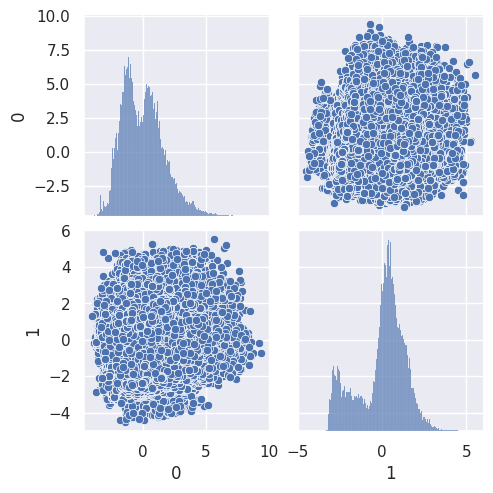

In [34]:
sns.pairplot(pca_df)

PCA aplicado seleccionando algunas caracteristicas

In [35]:
numeric_columns = ['region', 'price', 'sqfeet', 'beds', 'baths']
numeric_data = db[numeric_columns]
normalized_data = scaler.fit_transform(numeric_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)
print(pca_result)

[[ 1.43209995  0.65431483]
 [ 0.68579431  0.80325178]
 [ 2.25239838  1.18372461]
 ...
 [-0.48538587  0.9188467 ]
 [ 0.79362261  0.97038624]
 [ 0.67314218  0.87559204]]


Grafico dispersion en base a los componentes generados

<Axes: xlabel='componente_1', ylabel='componente_2'>

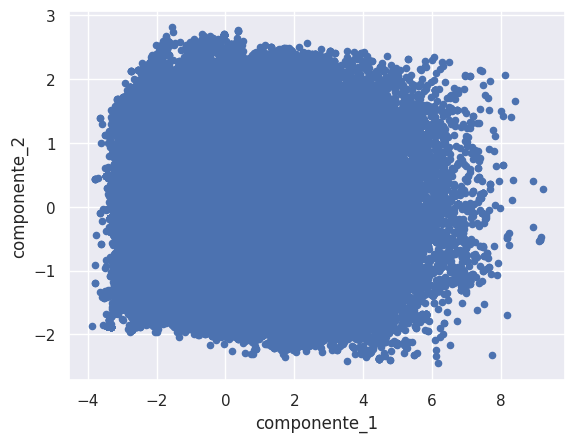

In [36]:
pca_df = pd.DataFrame(pca_result, columns=["componente_1", "componente_2"])

pca_df.plot(x="componente_1", y="componente_2", kind="scatter")

Agrego una variable mas "state" para ver si hay cambio grafico

In [37]:
# establezco las columnas numericas a utilizar
columnas_numericas1 = ['region', 'price', 'sqfeet', 'beds', 'baths', 'state']
# defino la data numerica a utilizar
data_numerica1 = db[columnas_numericas1]
# realizo escalado
data_normalizada1 = scaler.fit_transform(data_numerica1)
# establezco numero de componentes que me realizara PCA
pca = PCA(n_components=2)
# adapto el modelo para obtener los resultados
pca_result1 = pca.fit_transform(data_normalizada1)
print(pca_result)

[[ 1.43209995  0.65431483]
 [ 0.68579431  0.80325178]
 [ 2.25239838  1.18372461]
 ...
 [-0.48538587  0.9188467 ]
 [ 0.79362261  0.97038624]
 [ 0.67314218  0.87559204]]


<Axes: xlabel='Componente 1', ylabel='Componente 2'>

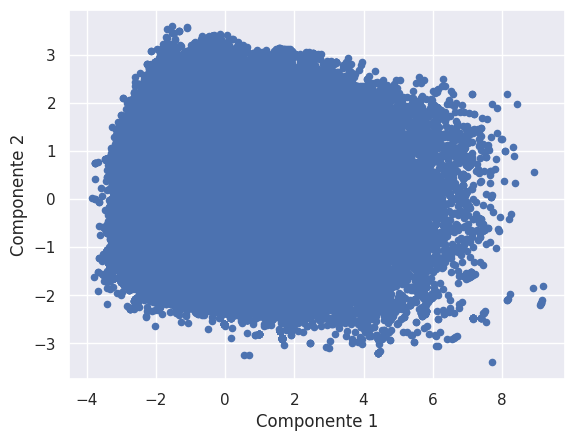

In [38]:
pca_df1 = pd.DataFrame(pca_result1, columns=["Componente 1", "Componente 2"])

pca_df1.plot(x="Componente 1", y="Componente 2", kind="scatter")

Aplico LDA

<Axes: xlabel='LDA_component_1', ylabel='LDA_component_2'>

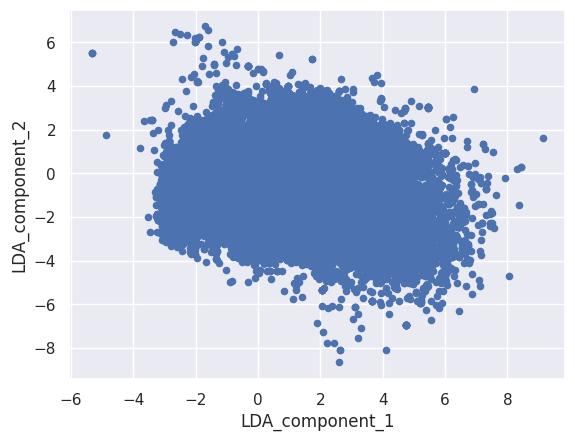

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# defino la variable objetivo
target = db["type"]

# especifico las variables numericas a utilizar
columnas_numericas = ['region', 'price', 'sqfeet', 'beds', 'baths']

# defino la data numerica a utilizar
data_numerica2 = db[columnas_numericas]

# escalado de la informacion
scaler = StandardScaler()
data_normalizada2 = scaler.fit_transform(data_numerica2)

# creo el modelo LDA defino dos componentes otra vez
lda = LinearDiscriminantAnalysis(n_components=2)

# adapto el modelo
lda.fit(data_normalizada2, target)

lda_result = lda.transform(data_normalizada2)

lda_df = pd.DataFrame(lda_result, columns=["LDA_component_1", "LDA_component_2"])

lda_df.plot(x="LDA_component_1", y="LDA_component_2", kind="scatter")


Parece incluir valores mas alejados que el grafico de PCA

**Algoritmos de clasifacion**



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


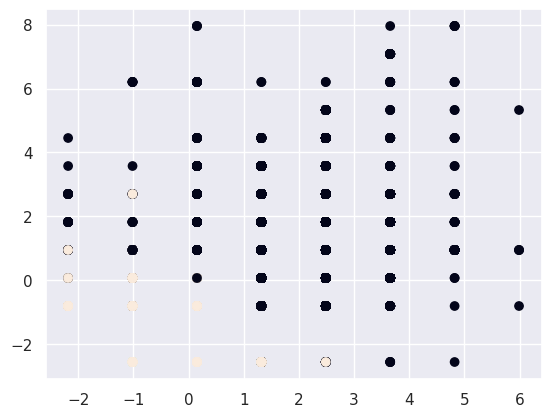

In [40]:
from sklearn.cluster import KMeans
# defino las columnas numericas
columnas_numericas5 = ['beds', 'baths', 'price', 'sqfeet']

# establezco la informacion a utilizar en base a las columnas previamente definidas
data_numerica5 = db[columnas_numericas5]

# escalo la informacion
scaler = StandardScaler()
data_normalizada5 = scaler.fit_transform(data_numerica5)

# creamos el modelo de Kmeans con parametro de dos clusters
kmeans = KMeans(n_clusters=2)

# ajusto el modelo
kmeans.fit(data_normalizada5)

# etiquetas de clúster para cada punto de datos
cluster_labels = kmeans.predict(data_normalizada5)

# grafico
plt.scatter(data_normalizada5[:, 0], data_normalizada5[:, 1], c=cluster_labels)
plt.show()

No se llegan a ver bien algunos colores por ende voy a aplicar una reformulacion del codigo anterior para generar una visualizacion mejor

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


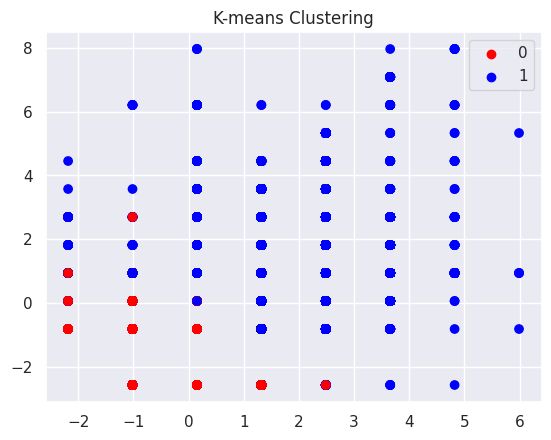

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# columnas numericas
columnas_numericas5 = ['beds', 'baths', 'price', 'sqfeet']

# informacion a utilizar en base a las columnas previamente definidas
data_numerica5 = db[columnas_numericas5]

# escalo la informacion
scaler = StandardScaler()
data_normalizada5 = scaler.fit_transform(data_numerica5)

# creamos el modelo de Kmeans con parametro de dos clusters
kmeans = KMeans(n_clusters=2)

# ajusto el modelo
kmeans.fit(data_normalizada5)

# etiquetas de clúster para cada punto de datos
cluster_labels_kmean1 = kmeans.predict(data_normalizada5)

# valores
unique_labels_1 = set(cluster_labels_kmean1)

# paleta colores
custom_palette = sns.color_palette('Set1', len(unique_labels_1))

# paleta de dos colores
custom_palette = ['red', 'blue']

# color a cada valor
label_color_dict = {label: color for label, color in zip(unique_labels_1, custom_palette)}

# lista de colores
point_colors = [label_color_dict[label] for label in cluster_labels_kmean1]

# grafica
plt.scatter(data_normalizada5[:, 0], data_normalizada5[:, 1], c=point_colors)
plt.title('K-means Clustering')

# leyenda para distinguir grupos
unique_labels = np.unique(cluster_labels_kmean1)
for label, color in zip(unique_labels, custom_palette):
    plt.scatter([], [], c=color, label=label)
plt.legend()

plt.show()


Este grafico debio quedar determinado de la siguiente manera, tan "segmentado" por el hecho de la cofiguracion que se le dieron a las variables "beds" y "baths" donde se establecieron numeros enterios, por ende como vemos los puntos casi sobre las intersecciones.

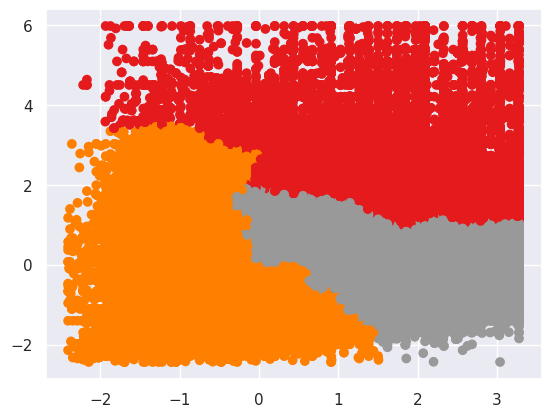

In [49]:
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler
import seaborn as sns
db2 = db.copy()
# columnas numericas
columnas_numericas6 = ['price', 'sqfeet']

data_numerica6 = db2[columnas_numericas6]

# escalado
scaler = StandardScaler()
data_normalizada6 = scaler.fit_transform(data_numerica6)

# modelo BIRCH
birch = Birch(n_clusters=3, threshold=0.5, branching_factor=50)
birch.fit(data_normalizada6)

import matplotlib.pyplot as plt
import seaborn as sns

# clusters
cluster_labels2 = birch.predict(data_normalizada6)

# color
cmap = plt.cm.Set1

# gráficos
plt.scatter(data_normalizada6[:, 0], data_normalizada6[:, 1], c=cluster_labels2, cmap=cmap)
plt.show()

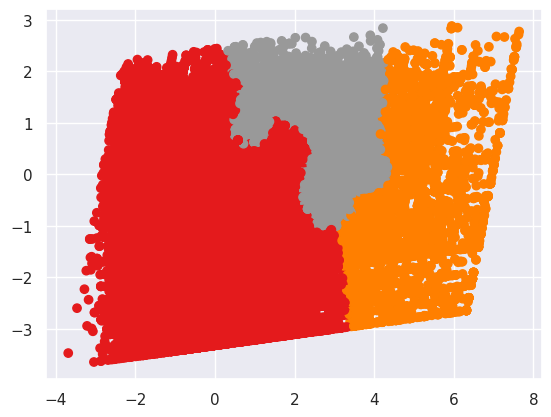

In [50]:
datanumerica_prueba1 =['price', 'sqfeet']

# defino la data numerica a utilizar
data_numerica_prueba1 = db2[datanumerica_prueba1]

# escalado de la informacion
scaler = StandardScaler()
data_normalizada_prueba1 = scaler.fit_transform(data_numerica_prueba1)

# adapto el modelo
lda.fit(data_normalizada_prueba1, target)

lda_result = lda.transform(data_normalizada_prueba1)

# Create a BIRCH model
birch = Birch(n_clusters=3, threshold=0.5, branching_factor=50)

# Fit the model to the data
birch.fit(lda_result)

import matplotlib.pyplot as plt
import seaborn as sns

# Get the cluster labels
cluster_labels3 = birch.predict(lda_result)

# Use the Set1 color palette
cmap = plt.cm.Set1

# Plot the clusters
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=cluster_labels3, cmap=cmap)
plt.show()